In [28]:
import numpy as np
import skimage as sk
import skimage.io as skio
import sys
from helpers import *

In [43]:
fname = 'lady.tif'
search_depth = 5
search_width = 3

In [44]:
in_path = f'images/{fname}'
out_path = f'bin/_{fname}'
im = skio.imread(in_path)

In [45]:
im = sk.img_as_float(im)
height = int(np.floor(im.shape[0] / 3.0))
b = im[:height]
g = im[height: 2*height]
r = im[2*height: 3*height]

In [46]:
im_out = np.dstack([r, g, b])
np.shape(im_out)

(3212, 3761, 3)

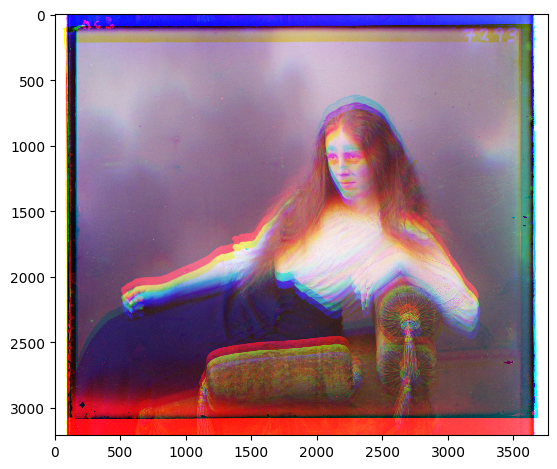

In [47]:

formatted_im = (im_out * 255).astype(np.uint8)
skio.imsave(fname=out_path, arr=formatted_im)
skio.imshow(formatted_im)
skio.show()

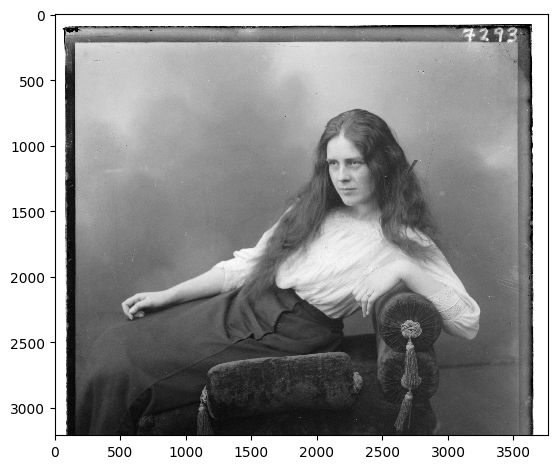

In [50]:
skio.imshow(b)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/skimage/io/_plugins/matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


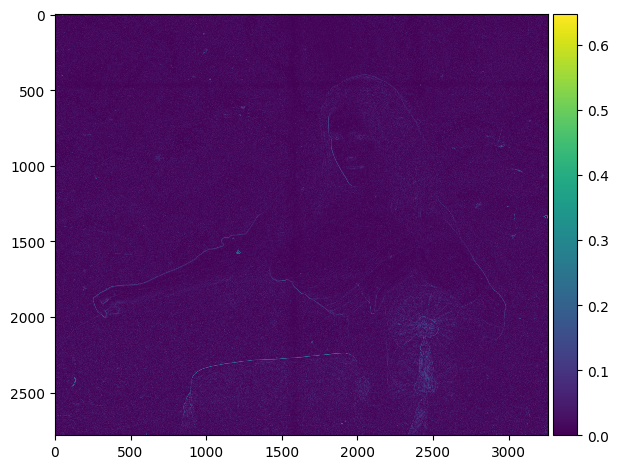

In [51]:
r_edges = compute_edges(r, crop_percent=15)
skio.imshow(r_edges)
skio.show()

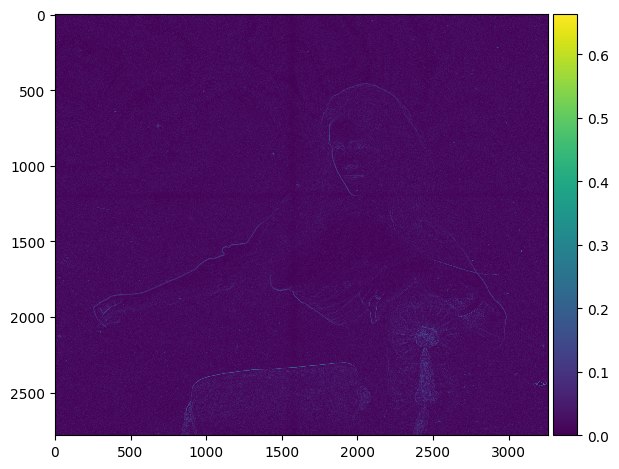

In [52]:
g_edges = compute_edges(g, crop_percent=15)
skio.imshow(g_edges)
skio.show()

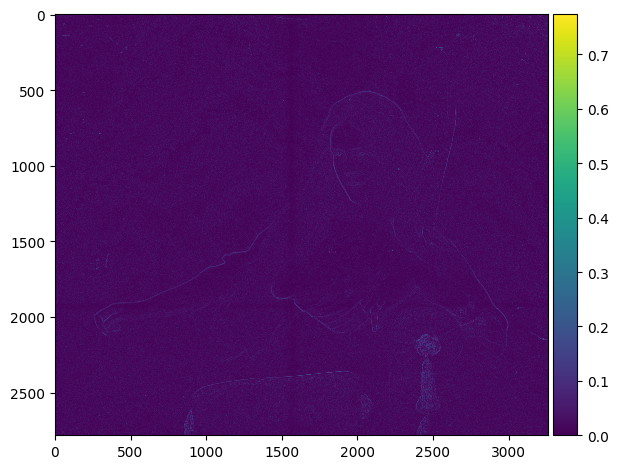

In [53]:
b_edges = compute_edges(b, crop_percent=15)
skio.imshow(b_edges)
skio.show()

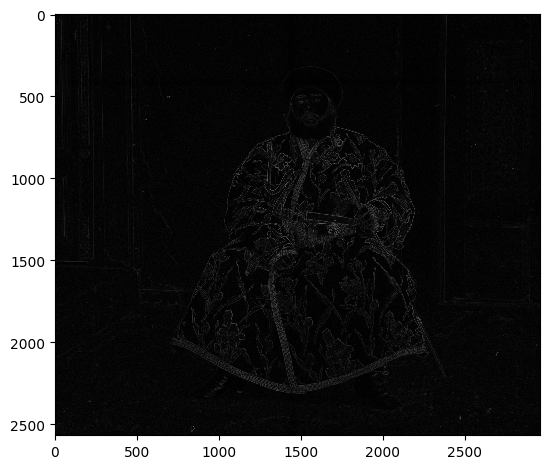

In [31]:
skio.imshow(r_edges)
skio.show()

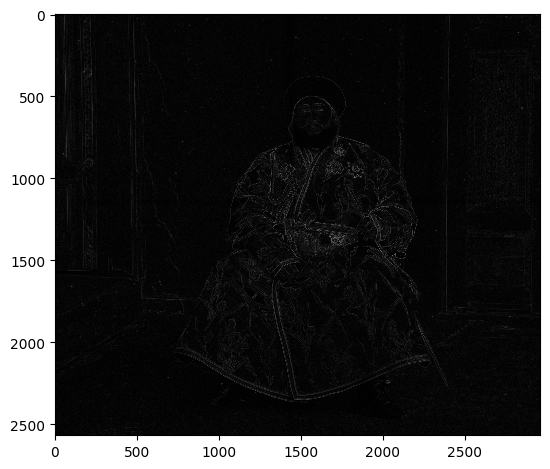

In [32]:
skio.imshow(g_edges)
skio.show()

In [34]:
g_off_x, g_off_y = compute_alignment(r_edges, g_edges, search_width, 0, 0, search_depth)
b_off_x, b_off_y = compute_alignment(r_edges, b_edges, search_width, 0, 0, search_depth)

aligned_g = np.roll(g, (g_off_x, g_off_y), axis=(0, 1))
aligned_b = np.roll(b, (b_off_x, b_off_y), axis=(0, 1))

g_x, g_y, b_x, b_y

Best: 0 0
Best: 0 0
Best: 0 0
Best: 0 0
Best: 0 0
Best: 0 0
Best: 0 0
Best: 0 0


NameError: name 'g_x' is not defined

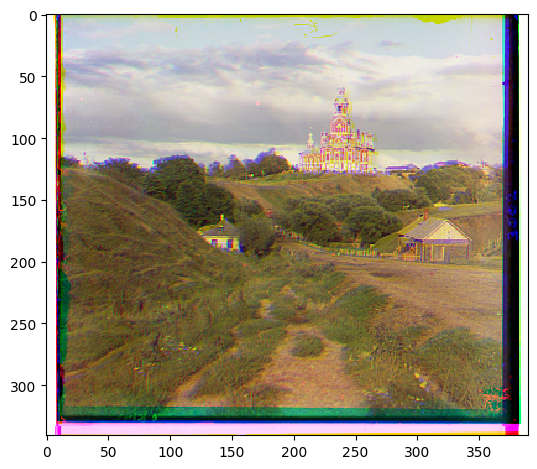

In [69]:
im_out = np.dstack([r, aligned_g, aligned_b])
formatted_im = (im_out * 255).astype(np.uint8)
skio.imsave(fname=out_path, arr=formatted_im)
skio.imshow(formatted_im)
skio.show()

In [72]:
def resize(img, factor):
    if factor == 1: return img
    rows, cols = img.shape
    new_rows = int(rows / factor)
    new_cols = int(cols / factor)
    resized = np.zeros((new_rows, new_cols))
    for i in range(new_rows):
        for j in range(new_cols):
            resized[i, j] = img[i*factor, j*factor]
    return resized

In [81]:
def compute_alignment(base, to_align, search_len, offset_x, offset_y, depth):
    base_resized = resize(base, 2**depth)
    to_align_resized = resize(to_align, 2**depth)

    min_diff = np.inf
    best_x, best_y = None, None
    for x in range(offset_x - search_len, offset_x + search_len + 1):
        for y in range(offset_y - search_len, offset_y + search_len + 1):
            attempt = np.roll(to_align_resized, (x, y), axis=(0, 1))
            diff = np.sqrt(np.sum((base_resized - attempt)**2))
            if diff < min_diff:
                min_diff = diff
                best_x, best_y = x, y
    
    if depth == 0: return best_x, best_y
    return compute_alignment(base, to_align, search_len, best_x, best_y, depth-1)

In [88]:
compute_alignment(r, b, 10, 0, 0, 5)

(-7, 1)

In [90]:
img = skio.imread("images/lady.tif")

In [91]:
np.shape(img)

(9637, 3761)

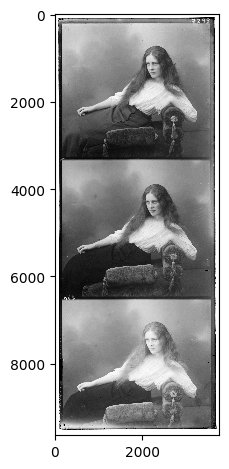

In [94]:
skio.imshow(img)
skio.show()

In [54]:
im = skio.imread("final/cathedral.jpg")
im = sk.img_as_float(im)
im = 0.299 * im[:,:,0] + 0.587  * im[:,:,1] + 0.114 * im[:,:,2]


In [63]:
np.shape(im)

(341, 390)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/skimage/io/_plugins/matplotlib_plugin.py:158: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


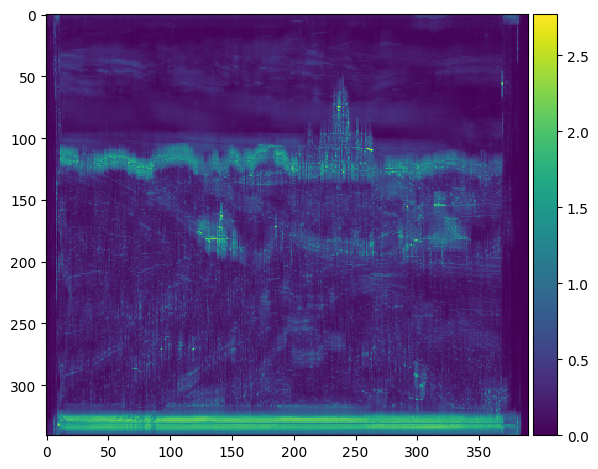

In [110]:


# distances = np.zeros(im.shape)

axis = 0
distances = np.sqrt(
    (im - np.roll(im, 1, axis=axis))**2 +
    (im - np.roll(im, 2, axis=axis))**2 +
    (im - np.roll(im, 3, axis=axis))**2 +
    (im - np.roll(im, 4, axis=axis))**2 +
    (im - np.roll(im, 5, axis=axis))**2 +
    (im - np.roll(im, 6, axis=axis))**2 +
    (im - np.roll(im, 7, axis=axis))**2 +
    (im - np.roll(im, 8, axis=axis))**2 +
    (im - np.roll(im, 9, axis=axis))**2 +
    (im - np.roll(im, 10, axis=axis))**2 +
    (im - np.roll(im, -1, axis=axis))**2 +
    (im - np.roll(im, -2, axis=axis))**2 +
    (im - np.roll(im, -3, axis=axis))**2 +
    (im - np.roll(im, -4, axis=axis))**2 +
    (im - np.roll(im, -5, axis=axis))**2 +
    (im - np.roll(im, -6, axis=axis))**2 +
    (im - np.roll(im, -7, axis=axis))**2 +
    (im - np.roll(im, -8, axis=axis))**2 +
    (im - np.roll(im, -9, axis=axis))**2 +
    (im - np.roll(im, -10, axis=axis))**2
)

skio.imshow(distances)
skio.show()

0.37962598252828944
0.3789012535453678
0.3775236836952644
0.3756252842547046
0.37310661444353677
0.3699376529363461
0.3661199409875827
0.3619353840228056
0.35790500247640594
0.3538635392211589
0.35095812178795976
0.34678533495567626
0.3422346038538818
0.33778653570823336
0.33337391964228524
0.3295411533634796
0.3266008551857652
0.32442234166843265
0.3227428045570891
0.3214974021629361
0.3207462866720917
0.3201369106366691
0.31950073614623203
0.31882884474253365
0.3181095899517145
0.3175513949291523
0.3172436393616484
0.31705967252377204
0.3169266187168369
0.3168037216420526
0.31670962017846604
0.31663735561389095
0.3166036595971019
0.3166024884836813
0.3165762712056488
0.3165340453432681
0.31651012718779287
0.3164546383993353
0.3164622461443571
0.3165188474196076
0.3165569017074649
0.3166081276591019
0.3167107228608251
0.3168409035158276
0.3169932095803942
0.3170999132903456
0.3172152366936165
0.3173688802634636
0.3175321772647965
0.31768357278872117
0.3178418104490132
37


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/skimage/io/_plugins/matplotlib_plugin.py:158: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


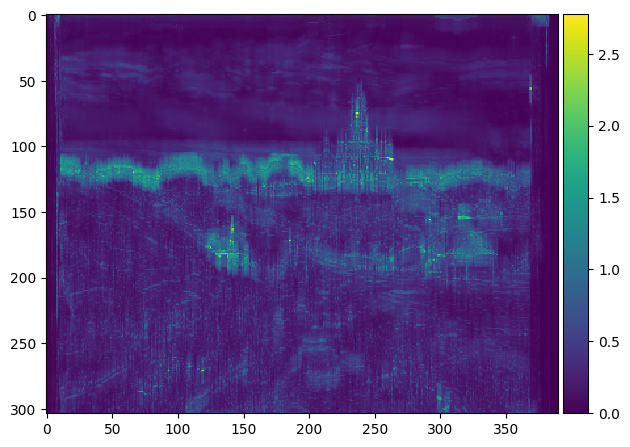

In [137]:
rows, cols = distances.shape
max_crop = int(0.15 * rows)

def crop_bottom_by_n_pixels(img, n):
    n = int(n)
    rows, _ = img.shape
    return img[:rows - n, :]

crop_size = max_crop // 2**depth
best_score = np.mean(distances)
best_crop = 0
for i in range(max_crop):
    attempt = crop_bottom_by_n_pixels(distances, i)
    attempt_score = attempt.mean()
    print(attempt_score)
    if attempt_score < best_score:
        best_score = attempt_score
        best_crop = i

print(best_crop)
cropped = crop_bottom_by_n_pixels(distances, best_crop)
skio.imshow(cropped)
skio.show()

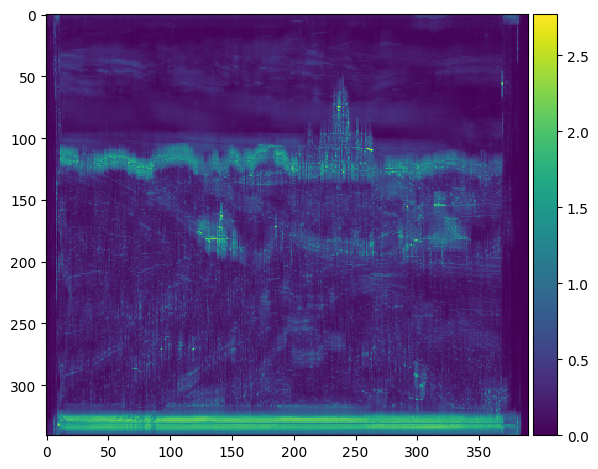

In [124]:
a = crop_bottom_by_n_pixels(distances, 0)
skio.imshow(a)
skio.show()

2.5